<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/iris_KNN_LR_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iris 데이터 KNN, LR, SGD 학습 및 평가. +최적화

https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv

#데이터 전처리

In [42]:
#데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
print(pd.unique(df['Species']))

['setosa' 'versicolor' 'virginica']


In [44]:
#클래스 분리

iris_input=df.drop(columns='Species').to_numpy()
iris_target=df['Species'].to_numpy()

In [45]:
#훈련세트 테스트세트 분리
from sklearn.model_selection import train_test_split

#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=42, stratify=iris_target)

In [46]:
#데이터 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

#KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9821428571428571
0.9210526315789473


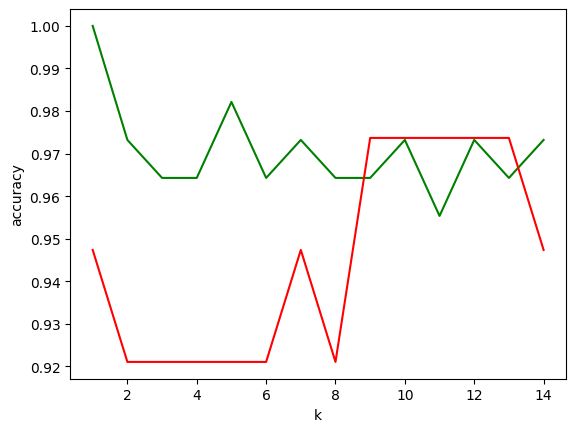

In [48]:
#최적화
import matplotlib.pyplot as plt

knn_test_score=[]
knn_train_score=[]

k_values=range(1,15)

for k in k_values:
  kn=KNeighborsClassifier(n_neighbors=k)
  kn.fit(train_input, train_target)
  knn_train_score.append(kn.score(train_input, train_target))
  knn_test_score.append(kn.score(test_input, test_target))

plt.plot(k_values, knn_train_score, color='green')
plt.plot(k_values, knn_test_score,color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [49]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9732142857142857
0.9736842105263158


#Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9732142857142857
0.9210526315789473


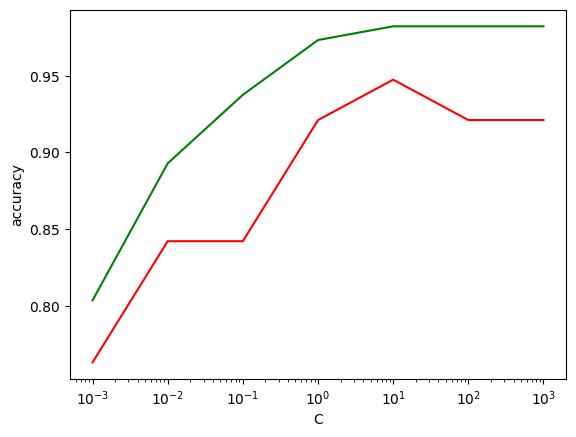

In [51]:
#최적화
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lr_train_score=[]
lr_test_score=[]

for C in C_values:
  lr = LogisticRegression(C=C)
  lr.fit(train_input, train_target)
  lr_train_score.append(lr.score(train_input, train_target))
  lr_test_score.append(lr.score(test_input, test_target))

plt.plot(C_values, lr_train_score, color='green')
plt.plot(C_values, lr_test_score, color='red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [52]:
lr = LogisticRegression(C=10)
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9821428571428571
0.9473684210526315


#SGD

In [53]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', random_state=42)

sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.8035714285714286
0.7894736842105263


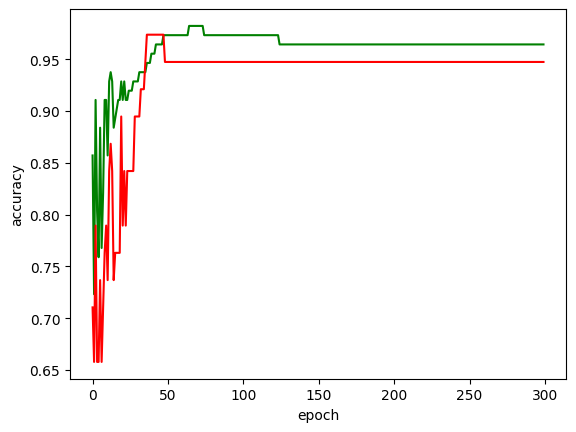

In [54]:
#최적화

sc = SGDClassifier(loss='log_loss', random_state=42)


sgd_train_score=[]
sgd_test_score=[]

classes=np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_input, train_target, classes=classes)
  sgd_train_score.append(sc.score(train_input, train_target))
  sgd_test_score.append(sc.score(test_input, test_target))

plt.plot(sgd_train_score, color='green')
plt.plot(sgd_test_score, color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [55]:
sc = SGDClassifier(loss='log_loss', max_iter=150, tol=None, random_state=42)
sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.9642857142857143
0.9473684210526315
